In [ ]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns

In [ ]:
# Read the data from the CSV file
dfAmazon = pd.read_csv('export_electronics.csv')

## Let's look at the dimensions of our data

In [ ]:
dfAmazon.shape

(5000, 10)

## Removing some unnecessary columns.


In [ ]:
dfAmazon_C = dfAmazon.drop(columns=['Unnamed: 6','Unnamed: 0'])
dfAmazon_C

,asin,product name,ratings,reviews,helpful,date,target,text
0,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4,\n\n I love my echo dot. I have four of them...,"2,827",8-Jan-20,p,\n\n I love my echo dot. I have four of them...
1,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I've been a happy owner of a 2nd generat...,"13,438",15-Oct-18,p,\n\n I've been a happy owner of a 2nd generat...
2,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,3,\n\n I have 5 Echo Dots (gen 2) and we use th...,"2,015",15-Oct-18,n,\n\n I have 5 Echo Dots (gen 2) and we use th...
3,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I was debating between this and the regu...,"1,571",17-Oct-18,p,\n\n I was debating between this and the regu...
4,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4,\n\n Es una ayuda sin reservas. A medianoche...,447,21-Jan-19,p,\n\n Es una ayuda sin reservas. A medianoche...
...,...,...,...,...,...,...,...,...
4995,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I received the original echo when it fir...,0,15-Jan-20,p,\n\n I received the original echo when it fir...
4996,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I got a 3rd gen echo dot bundled with a ...,0,11-Dec-19,p,\n\n I got a 3rd gen echo dot bundled with a ...
4997,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n The device does just what it says it wil...,1,1-Jan-20,p,\n\n The device does just what it says it wil...
4998,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I disliked how I was treated when I call...,0,31-Jan-20,p,\n\n I disliked how I was treated when I call...


## Renaming 2 columns for clarity.

In [ ]:
dfAmazon_C.rename(columns = {'target':'postive/negative', 'product name':'product_name'}, inplace = True)

In [ ]:
dfAmazon_C

,asin,product_name,ratings,reviews,helpful,date,postive/negative,text
0,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4,\n\n I love my echo dot. I have four of them...,"2,827",8-Jan-20,p,\n\n I love my echo dot. I have four of them...
1,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I've been a happy owner of a 2nd generat...,"13,438",15-Oct-18,p,\n\n I've been a happy owner of a 2nd generat...
2,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,3,\n\n I have 5 Echo Dots (gen 2) and we use th...,"2,015",15-Oct-18,n,\n\n I have 5 Echo Dots (gen 2) and we use th...
3,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I was debating between this and the regu...,"1,571",17-Oct-18,p,\n\n I was debating between this and the regu...
4,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4,\n\n Es una ayuda sin reservas. A medianoche...,447,21-Jan-19,p,\n\n Es una ayuda sin reservas. A medianoche...
...,...,...,...,...,...,...,...,...
4995,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I received the original echo when it fir...,0,15-Jan-20,p,\n\n I received the original echo when it fir...
4996,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I got a 3rd gen echo dot bundled with a ...,0,11-Dec-19,p,\n\n I got a 3rd gen echo dot bundled with a ...
4997,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n The device does just what it says it wil...,1,1-Jan-20,p,\n\n The device does just what it says it wil...
4998,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I disliked how I was treated when I call...,0,31-Jan-20,p,\n\n I disliked how I was treated when I call...


In [ ]:
dfAmazon_C.head()

,asin,product_name,ratings,reviews,helpful,date,postive/negative,text,sentiment,length
0,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4,\n\n I love my echo dot. I have four of them...,"2,827",8-Jan-20,p,\n\n I love my echo dot. I have four of them...,0.093529,638
1,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I've been a happy owner of a 2nd generat...,"13,438",15-Oct-18,p,\n\n I've been a happy owner of a 2nd generat...,0.153475,13545
2,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,3,\n\n I have 5 Echo Dots (gen 2) and we use th...,"2,015",15-Oct-18,n,\n\n I have 5 Echo Dots (gen 2) and we use th...,0.202600,2138
3,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I was debating between this and the regu...,"1,571",17-Oct-18,p,\n\n I was debating between this and the regu...,0.139850,1394
4,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,4,\n\n Es una ayuda sin reservas. A medianoche...,447,21-Jan-19,p,\n\n Es una ayuda sin reservas. A medianoche...,0.000000,400


In [ ]:
dfAmazon_C.tail()

,asin,product_name,ratings,reviews,helpful,date,postive/negative,text,sentiment,length
4995,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I received the original echo when it fir...,0,15-Jan-20,p,\n\n I received the original echo when it fir...,0.277500,332
4996,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I got a 3rd gen echo dot bundled with a ...,0,11-Dec-19,p,\n\n I got a 3rd gen echo dot bundled with a ...,0.127232,495
4997,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n The device does just what it says it wil...,1,1-Jan-20,p,\n\n The device does just what it says it wil...,0.137500,432
4998,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I disliked how I was treated when I call...,0,31-Jan-20,p,\n\n I disliked how I was treated when I call...,-0.100000,418
4999,B07PGL2N7J,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,5,\n\n I had some difficulty setting up the int...,0,17-Jan-20,p,\n\n I had some difficulty setting up the int...,0.325000,323


## Let's perform our own sentiment analysis on the reviews section of the data.

In [ ]:
# Create empty lists to store the sentiment and subjectivity values
sentiment = []
subjectivity = []

# Loop through the rows of the DataFrame
for index, row in dfAmazon_C.iterrows():
  # Get the text from the "text" column of the current row
  text = row["reviews"]
  
  # Use TextBlob to perform sentiment analysis on the text
  analysis = TextBlob(text)
  
  # Store the sentiment and subjectivity values in the lists
  sentiment.append(analysis.sentiment.polarity)
  subjectivity.append(analysis.sentiment.subjectivity)

In [ ]:
dfAmazon_C.info

<bound method DataFrame.info of             asin                                       product_name  ratings  \
0     B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        4   
1     B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        5   
2     B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        3   
3     B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        5   
4     B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        4   
...          ...                                                ...      ...   
4995  B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        5   
4996  B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        5   
4997  B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        5   
4998  B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        5   
4999  B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        5   

       

In [ ]:
dfAmazon_C.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             asin                                       product_name  ratings  \
0     B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        4   
1     B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        5   
2     B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        3   
3     B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        5   
4     B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        4   
...          ...                                                ...      ...   
4995  B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        5   
4996  B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        5   
4997  B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        5   
4998  B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with Alexa ...        5   
4999  B07PGL2N7J  Echo Dot (3rd Gen) - Smart speaker with 

## Creating a data frame using seaborn to visualize the overall sentiment.


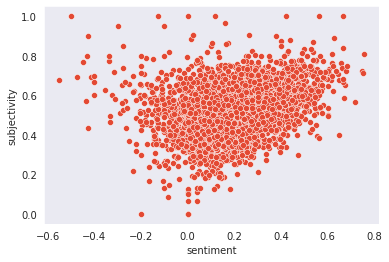

In [ ]:
# Create a new DataFrame with the sentiment and subjectivity values
results = pd.DataFrame({"sentiment": sentiment, "subjectivity": subjectivity})

sns.set_style("dark")
sns.set_palette("RdYlBu")

# Use seaborn to create a scatterplot of the sentiment and subjectivity values
sns.scatterplot(x="sentiment", y="subjectivity", data=results)

# Let's see if we can get a better look at the distribution of sentiment.

## There appears to be some variance in sentiment, but it seems to skew more towards positive.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


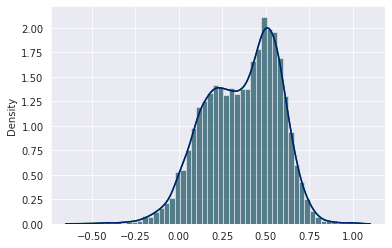

In [ ]:
# Adding style to graphs
sns.set_style("darkgrid")
sns.distplot(results, color="g")
# displaying original results
sns.distplot(results)

# Let's see if there is some correlation between the length of the review and the sentiment.

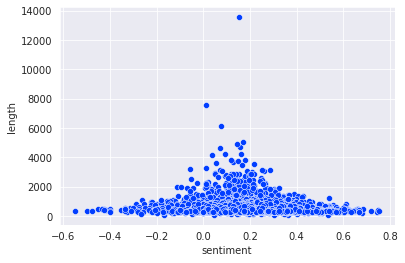

In [ ]:
dfAmazon_2 = dfAmazon_C

# Calculate the sentiment and length of each piece of text
dfAmazon_2['sentiment'] = dfAmazon_2['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
dfAmazon_2['length'] = dfAmazon_2['text'].apply(lambda x: len(x))

# Generate the scatterplot
sns.set_style("darkgrid")
sns.set_palette("bright")

# Create a scatter plot
sns.scatterplot(x='sentiment', y='length', data=dfAmazon_2)

## Longer reviews tend toward being more positive. However, overall, it appears to be well-balanced.